# 2020-05-03 課題
- [コンテンツの案内ページ](https://phasetr.com/mthlp1/)
- [GitHub へのリンク](https://github.com/phasetr/studygroup/programming-for-junior-highschool-mathphys)
- matplotlib の公式ドキュメントを見ていろいろ遊んでみてください。例えば次のようなことを試してみてください。
    - 線の色を変えてみる。
    - 点にマーカーをつける。
    - 公式のサンプルやチュートリアルを試してみる。
- 引き続き TeX でいろいろな式を書いてみましょう。式が書けると数学系のコミュニケーションがだいぶ楽になります。
- 引き続きプログラムをいろいろいじってみましょう. 例えば次のような方針があります. コンテンツからのコピペで構いません. 適切にコピペして動かすだけでも割と大変なので.
    - (numpy を使って) いろいろな関数のグラフを描いてみましょう.
    - (sympy を使って) いろいろな連立方程式を解いてみましょう. グラフを描くのもおすすめです.
    - いろいろな微分方程式を解いてみましょう. 実際にコンテンツでも紹介しているように, 分点を自分でも変えていじってみるとのが第一歩です.

# 自分用メモ
- 遅延型方程式に対するコメント追加
- import に関する実演
- Jupyter （IPython）でのはまりどころ解説を作ろう
    - いったん変数を作ると他のセルでも読み込める（読み込めてしまう）
    - 「セルを上から順に読み込まないと動かない」問題の原因
    - カーネル再起動まで変数は残り続ける

# 解答例

## プログラムのコピペの功罪
- プログラムをコピペしているだけだと自力で組み上げる力がつかない
- 私の作るコンテンツは基本的に「世のいろいろなコンテンツのギャップを埋める」ことを目的にする
    - 大きな展望を見えるようにする
    - 中規模の目標を作る
- 初学の段階で小さいプログラムしか書けないのもつまらない
- 世にある「まとも」なプログラム（numpy などのライブラリ）は規模が大きいので読む・勉強するのが大変
- どのくらいの規模のプログラムでどのくらいのモノが作れるのかを見たい
- コピペであってもプログラムが動けばそれだけで面白い（こともある）
- ある程度先まで見通せないと面白さも見えず、やる気が続かない
- 程々の規模のプログラムをコピペして動かしてみて様子を掴もう

## matplotlib
- [公式サンプル](https://matplotlib.org/3.2.1/tutorials/introductory/sample_plots.html)
- [これも公式](https://matplotlib.org/3.2.1/gallery/index.html#mplot3d-examples-index)：サンプルコードもある。
- 次のコードは[コッホ曲線のサンプル](https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/fill.html#sphx-glr-gallery-lines-bars-and-markers-fill-py)から。

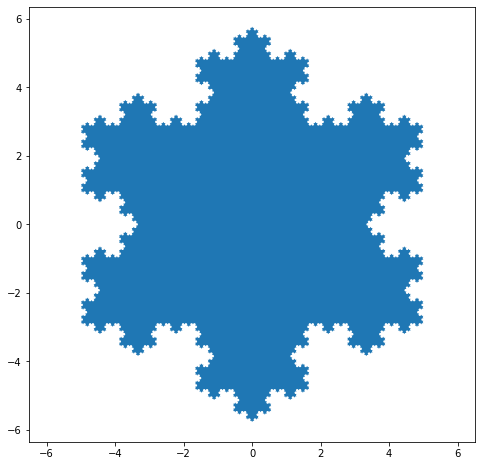

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

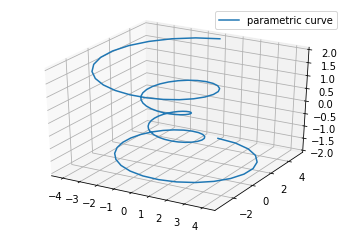

In [0]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

# Prepare arrays x, y, z
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

## TeX でいろいろな式を書こう
### Poisson 積分
- [URL](https://mathworld.wolfram.com/PoissonIntegral.html)

\begin{align}
u\left(z_{0}\right)
&=
\frac{1}{2 \pi} \int_{0}^{2 \pi} u\left(e^{i \psi}\right) \frac{1-\left|z_{0}\right|^{2}}{| z_{0}-e^{\left.j \phi\right|^{2}}} d \psi, \\
u(x, y)
&=
\frac{1}{2 \pi} \int_{0}^{2 \pi} u(a \cos \phi, a \sin \phi) \frac{a^{2}-R^{2}}{a^{2}+R^{2}-2 a R \cos (\theta-\phi)} d \phi, \\
u(x, y, z)&=\frac{1}{4 \pi a} \int_{S} u \frac{a^{2}-R^{2}}{\left(a^{2}+R^{2}-2 a R \cos \theta\right)^{3 / 2}} d S.
\end{align}

## いろいろなプログラムを書こう

### numpy でのグラフ

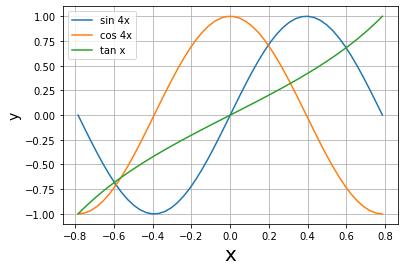

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi / 4, np.pi / 4)
plt.plot(x, np.sin(4 * x), label="sin 4x")
plt.plot(x, np.cos(4 * x), label="cos 4x")
plt.plot(x, np.tan(x), label="tan x")

plt.xlabel("x", size=20)
plt.ylabel("y", size=14)
plt.grid()
plt.legend()

plt.show()

### sympy
- Colab 上でもローカルの Jupyter でも動くようにしたい。
- $n=-1$ の場合分けも勝手にやってくれてすごい。

In [0]:
# colab の場合
from IPython.display import Math, HTML
def load_mathjax_in_cell_output():
    display(HTML("<script src='https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

In [0]:
# シンボル定義
x,n = symbols('x,n')

int = Integral(x**n, (x, 0, x))
print("積分それ自体を表示できる")
display(int)

積分それ自体を表示できる


<IPython.core.display.Javascript object>

x      
⌠      
⎮  n   
⎮ x  dx
⌡      
0      

In [0]:
print("単純な計算結果：場合分けまでしてくれるし、0 での無限大もそう書いてくれる")
display(int.doit())

単純な計算結果：場合分けまでしてくれるし、0 での無限大もそう書いてくれる


<IPython.core.display.Javascript object>

⎧   log(x) + ∞      for n = -1
⎪                             
⎪   n + 1    n + 1            
⎨  0        x                 
⎪- ────── + ──────  otherwise 
⎪  n + 1    n + 1             
⎩                             

In [0]:
print("simplify() で 0 を消せる")
display(simplify(int.doit()))

simplify() で 0 を消せる


<IPython.core.display.Javascript object>

⎧log(x) + ∞  for n = -1
⎪                      
⎪   n + 1              
⎨  x                   
⎪  ──────    otherwise 
⎪  n + 1               
⎩                      

In [0]:
# 全部ひとまとまりにする
from IPython.display import Math, HTML
def load_mathjax_in_cell_output():
    display(HTML("<script src='https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)



### 微分方程式
- フィッツヒュー・南雲方程式
    - [ホジキン-ハクスレー理論](http://www005.upp.so-net.ne.jp/yoshida_n/kasetsu/subject/sub27.htm)で出てきたモデルの簡略化
    - ヤリイカの巨大神経細胞軸索を用いた研究をもとに定式化した神経興奮に関する基礎理論 (Journal of Physiology 117(1952)500-ほか)
    - この業績で 1963 年にノーベル賞（生理学医学賞）を受賞

\begin{align}
y_{t}&=c\left(y-\frac{y^{3}}{3}-x+I(t)\right),\\x_{t}&=y-bx+a.
\end{align}

- $I$ は時間の関数で構わないが、以下のシミュレーションでは定数にしている。
    - $I$ が 0.34 以上かどうかで解のふるまいが定性的に変わる。
    - 力学系の話。
- Colab 上で動画を表示させるところまでできなかったので作った動画は YouTube で：[Rust 版動画](https://www.youtube.com/watch?v=yKEGwUXjSMw&list=PLSBzltjFopraTJUYDMXnj1GdYCdR0QyzU&index=115)

In [0]:
# https://omedstu.jimdofree.com/2018/06/21/fitzhugh-nagumoモデルをアニメーションで見る/
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.integrate as integrate
 
I = 0.34 #external stimulus
a = 0.7
b = 0.8
c = 10
 
def FHN(state, t):
    """
    FitzHugh-Nagumo Equations
    u : the membrane potential
    v : a recovery variable
    """
    u, v = state
    dot_u = c * (-v + u - pow(u,3)/3 + I)
    dot_v = u - b * v + a
    return dot_u, dot_v
 
#initial state
u0 = 2.0
v0 = 1.0
 
fig = plt.figure()
t = np.arange(0.0, 10, 0.01)
len_t = len(t) 
dt = 5 #time steps
 
#animationの1step
def update(i):
    global y, y0
     
    #y0の初期値の設定
    if i ==0:
        y0 = [u0, v0]
     
    plt.cla() #現在描写されているグラフを消去
     
    #微分方程式を解く
    y = integrate.odeint(FHN, y0, t)
     
    #1Step(=dt)後のyの値を次のステップでのy0の値に更新する
    y0 = (y[dt,0], y[dt,1]) 
     
    #配列としてu,vを取得
    u = y[:,0] 
    v = y[:,1]
     
    #描画
    plt.plot(t, u, label="u : membrane potential", color="#ff7f0e") 
    plt.plot(t, v, label="v : recovery variable", color="#1f77b4")
    plt.plot(t[len_t-1], u[len_t-1],'o--', color="#ff7f0e") #uのmarker
    plt.plot(t[len_t-1], v[len_t-1],'o--', color="#1f77b4") #vのmarker
    plt.title("Membrane Potential / Volt")
    plt.grid()
    plt.legend(bbox_to_anchor=(0, 1),
               loc='upper left',
               borderaxespad=0)

    return (u, v)
    
anim = animation.FuncAnimation(fig, update, interval=100,
                              frames=300)
plt.close(anim._fig)
HTML(anim.to_jshtml(default_mode='reflect'))

# 質問メモ
- numpy：モジュール名と関数名を「.」でつなぐ `np.array()` 関数
- クラスとオブジェクトの話。
    - じ

シューティングゲーム
- 敵の弾（概念）：クラス：弾がどこにあるか x,y
- 具体的に画面に現れる弾： x=1, y=1

In [0]:
import numpy as np
print(type(np.array))
#print(type(np.array()))

<class 'builtin_function_or_method'>


In [0]:
from numpy import *
print(type(array))

<class 'builtin_function_or_method'>


In [0]:
a = [1,2]
print(len(a))